In [22]:
import numpy as np 
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
X1 = np.random.normal(size=10000)
X2 = np.random.normal(size=10000)
X3 = np.random.normal(size=10000)

In [13]:
datos = pd.DataFrame({'X1':X1,'X2':X2,'X3':X3})

In [14]:
def f(x,y,z):
    return np.sin(x**2)-np.exp(y)+z**3

In [15]:
datos['Y'] = np.vectorize(f)(datos['X1'],datos['X2'],datos['X3'])

/home/jose/entornos/tse/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


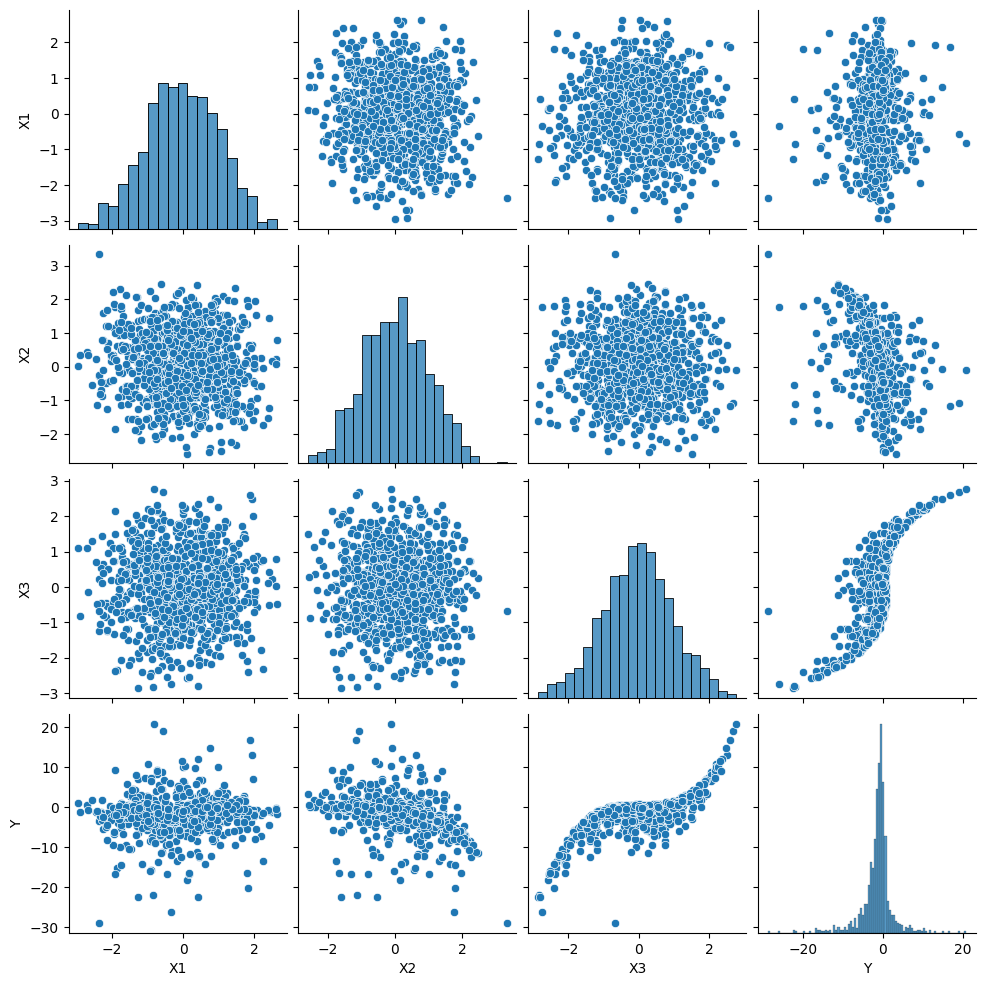

In [16]:
sns.pairplot(datos.sample(1000))

In [19]:
Xt,Xv,yt,yv = train_test_split(datos[['X1','X2','X3']],datos['Y'],test_size=0.3)
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
yt.reset_index(drop=True,inplace=True)
yv.reset_index(drop=True,inplace=True)
Xt.shape,Xv.shape,yt.shape,yv.shape

((7000, 3), (3000, 3), (7000,), (3000,))

In [20]:
red = MLPRegressor()

In [21]:
hp = {'hidden_layer_sizes':[(a,b,c,) for a in range(1,10) for b in range(1,10) for c in range(1,10)],
        'activation':['relu','logistic','tanh','identity'],
        'learning_rate':['constant','invscaling','adaptive'],
        'max_iter':[1000]}

reduce(lambda x,y:x*y,[len(hp[i]) for i in hp.keys()])

8748

In [29]:
grid = RandomizedSearchCV(red,hp,cv=3,n_iter=20,verbose=1,n_jobs=-1,scoring='neg_mean_absolute_percentage_error')

In [30]:
grid.fit(Xt,yt)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/jose/entornos/tse/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jose/entornos/tse/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jose/entornos/tse/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jose/entornos/tse/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jose/entornos/tse/lib/

RandomizedSearchCV(cv=3, estimator=MLPRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'activation': ['relu', 'logistic',
                                                       'tanh', 'identity'],
                                        'hidden_layer_sizes': [(1, 1, 1),
                                                               (1, 1, 2),
                                                               (1, 1, 3),
                                                               (1, 1, 4),
                                                               (1, 1, 5),
                                                               (1, 1, 6),
                                                               (1, 1, 7),
                                                               (1, 1, 8),
                                                               (1, 1, 9),
                                                               (1, 2, 1),
                                                               (1, 2, 2),
                                                               (1, 2, 3),
                                                               (1, 2, 4),
                                                               (1, 2, 5),
                                                               (1, 2, 6),
                                                               (1, 2, 7),
                                                               (1, 2, 8),
                                                               (1, 2, 9),
                                                               (1, 3, 1),
                                                               (1, 3, 2),
                                                               (1, 3, 3),
                                                               (1, 3, 4),
                                                               (1, 3, 5),
                                                               (1, 3, 6),
                                                               (1, 3, 7),
                                                               (1, 3, 8),
                                                               (1, 3, 9),
                                                               (1, 4, 1),
                                                               (1, 4, 2),
                                                               (1, 4, 3), ...],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'max_iter': [1000]},
                   scoring='neg_mean_absolute_percentage_error', verbose=1)

In [31]:
grid.best_params_

{'max_iter': 1000,
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': (5, 9, 8),
 'activation': 'tanh'}

In [32]:
red = grid.best_estimator_
red.fit(Xt,yt)

MLPRegressor(activation='tanh', hidden_layer_sizes=(5, 9, 8),
             learning_rate='invscaling', max_iter=1000)

In [33]:
{'validación':mean_absolute_percentage_error(yv,red.predict(Xv)),
'entrenamiento':mean_absolute_percentage_error(yt,red.predict(Xt))}


{'validación': 1.667146329097947, 'entrenamiento': 1.6786563462822717}

<Axes: xlabel='Y', ylabel='Count'>

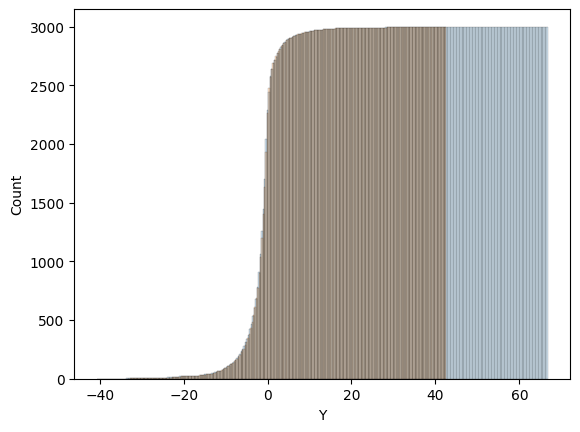

In [42]:
sns.histplot(yv,label='yv', alpha=0.2,cumulative=True)
sns.histplot(red.predict(Xv),label='yp', alpha=0.2,cumulative=True)

In [43]:
datos['y^'] = red.predict(datos[['X1','X2','X3']])

In [45]:
datos.sample(10)

,X1,X2,X3,Y,y^
4449,-0.205046,-0.143361,1.249363,1.125732,1.499839
4801,0.904651,-1.345912,-0.210991,0.460353,0.185274
4394,0.554339,1.677977,0.846545,-4.445565,-4.349754
4823,0.501120,-0.661677,0.505193,-0.138559,0.057845
5024,-0.947136,-0.033005,-2.504365,-15.893015,-16.019781
2458,-1.061037,1.003106,-0.619375,-2.061733,-2.507333
574,-1.108161,0.939978,-0.107277,-1.619335,-2.155228
8653,1.716138,-0.255858,-1.577172,-4.502221,-4.126914
4627,1.703573,-1.649242,1.405972,2.824222,2.964179
9921,-1.063905,-0.839097,-1.175713,-1.152071,-1.581425
